<a href="https://colab.research.google.com/github/cpenalozaj/Equipo35_MLOps/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information**



In [2]:
# Cargando las librerías
import os
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import drive # Se utiliza para conectarse con drive y leer los archivos del mismo

In [3]:
# Importamos el dataset
student_data = fetch_ucirepo(name='Student Academics Performance')

In [4]:
student_data

{'data': {'ids': None,
  'features':     ge   cst   tnp   twp   iap   esp arr         ms ls    as  ...  fq  mq  \
  0    F     G  Good  Good    Vg  Good   Y  Unmarried  V  Paid  ...  Um  10   
  1    M   OBC    Vg    Vg    Vg    Vg   N  Unmarried  V  Paid  ...  Um  Il   
  2    F   OBC  Good  Good    Vg  Good   N  Unmarried  V  Paid  ...  12  10   
  3    M  MOBC  Pass  Good    Vg  Good   N  Unmarried  V  Paid  ...  12  Um   
  4    M     G  Good  Good    Vg    Vg   N  Unmarried  V  Paid  ...  10  12   
  ..  ..   ...   ...   ...   ...   ...  ..        ... ..   ...  ...  ..  ..   
  126  M     G  Pass  Good  Good  Pass   Y  Unmarried  T  Free  ...  Um  Il   
  127  M  MOBC    Vg    Vg  Good  Good   N  Unmarried  V  Free  ...  10  Um   
  128  F   OBC  Good  Good    Vg  Good   N  Unmarried  V  Free  ...  Il  Il   
  129  M    ST  Pass  Pass  Good  Pass   Y  Unmarried  V  Free  ...  Um  Um   
  130  M     G  Pass  Good  Good  Pass   Y  Unmarried  V  Free  ...  Um  Um   
  
             f

In [5]:
# Data (as pandas dataframes)
X = student_data.data.features
y = student_data.data.targets

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(X.head())

  ge   cst   tnp   twp iap   esp arr         ms ls    as     fmi       fs  fq  mq        fo         mo       nf       sh       ss   me       tt      atd
0  F     G  Good  Good  Vg  Good   Y  Unmarried  V  Paid  Medium  Average  Um  10    Farmer  Housewife    Large     Poor     Govt  Asm    Small     Good
1  M   OBC    Vg    Vg  Vg    Vg   N  Unmarried  V  Paid     Low  Average  Um  Il   Service    Service    Small     Poor     Govt  Asm  Average  Average
2  F   OBC  Good  Good  Vg  Good   N  Unmarried  V  Paid      Am  Average  12  10   Service  Housewife  Average  Average     Govt  Asm    Large     Good
3  M  MOBC  Pass  Good  Vg  Good   N  Unmarried  V  Paid  Medium    Small  12  Um  Business   Business    Large     Poor     Govt  Asm  Average  Average
4  M     G  Good  Good  Vg    Vg   N  Unmarried  V  Paid      Am  Average  10  12   Service  Housewife    Large     Poor  Private  Asm    Small     Good


In [7]:
#print(y.head())
print(y)

None


In [8]:
# Revisamos la metadata
print(student_data.metadata)

{'uci_id': 467, 'name': 'Student Academics Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/467/student+academics+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/467/data.csv', 'abstract': 'The dataset tried to find the end semester percentage prediction based on different social, economic and academic attributes. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 300, 'num_features': 22, 'feature_types': [], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C50W30', 'creators': ['Sadiq Hussain'], 'intro_paper': {'ID': 455, 'type': 'NATIVE', 'title': 'Educational Data Mining and Analysis of Students’ Academic Performance Using WEKA', 'authors': 'Sadiq Hussain, N. A. Dahan, F. Ba-Alwi, Najoua Ribata', 'venue': ' Indonesian Jo

In [9]:
# Revisamos la information de las variables
print(student_data.variables)

   name     role         type demographic description units missing_values
0    ge  Feature  Categorical        None        None  None             no
1   cst  Feature  Categorical        None        None  None             no
2   tnp  Feature  Categorical        None        None  None             no
3   twp  Feature  Categorical        None        None  None             no
4   iap  Feature  Categorical        None        None  None             no
5   esp  Feature  Categorical        None        None  None             no
6   arr  Feature  Categorical        None        None  None             no
7    ms  Feature  Categorical        None        None  None             no
8    ls  Feature  Categorical        None        None  None             no
9    as  Feature  Categorical        None        None  None             no
10  fmi  Feature  Categorical        None        None  None             no
11   fs  Feature  Categorical        None        None  None             no
12   fq  Feature  Categor

# Dada la información obtenida en la revisión de las variables, se puede notar que todas son categóricas.

In [10]:
# Concatenamos ambos datasets (feature y target)
student_data_df = pd.concat([X, y], axis = 1)
student_data_df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [30]:
# Generamos la ruta en donde se almacenará
# directory = r'D:\ITESM\MNA-MLOps-Main\MLOps-private\data\raw'
directory = 'Equipo35_MLOps\data\raw'
file_path = os.path.join(directory, 'student_data_df.csv')

os.makedirs(directory, exist_ok=True)

In [31]:
#  Guardamos el dataset completo
student_data_df.to_csv(file_path, index=False)

In [11]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ge      131 non-null    object
 1   cst     131 non-null    object
 2   tnp     131 non-null    object
 3   twp     131 non-null    object
 4   iap     131 non-null    object
 5   esp     131 non-null    object
 6   arr     131 non-null    object
 7   ms      131 non-null    object
 8   ls      131 non-null    object
 9   as      131 non-null    object
 10  fmi     131 non-null    object
 11  fs      131 non-null    object
 12  fq      131 non-null    object
 13  mq      131 non-null    object
 14  fo      131 non-null    object
 15  mo      131 non-null    object
 16  nf      131 non-null    object
 17  sh      131 non-null    object
 18  ss      131 non-null    object
 19  me      131 non-null    object
 20  tt      131 non-null    object
 21  atd     131 non-null    object
dtypes: object(22)
memory usage

In [12]:
student_data_df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,5,3,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,63,89,40,52,38,115,58,59,91,62,78,56


In [17]:
# Ya que todos los estudiantes tienen un status de Unmarried no nos sirve esta variable
student_data_df = student_data_df.drop('ms', axis=1)

In [18]:
student_data_df.columns

Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ls', 'as', 'fmi', 'fs',
       'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

# **Verificación de valores erróneos y nulos**

In [19]:
#Verificamos valores erróneos
student_data_df.isna().sum()

ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

In [20]:
#Verificamos valores nulos
student_data_df.isnull().sum()

ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

Se logró identificar que no se presentan valores erróneos ni nulos

# **Análisis univariante**

# **Variables categóricas**

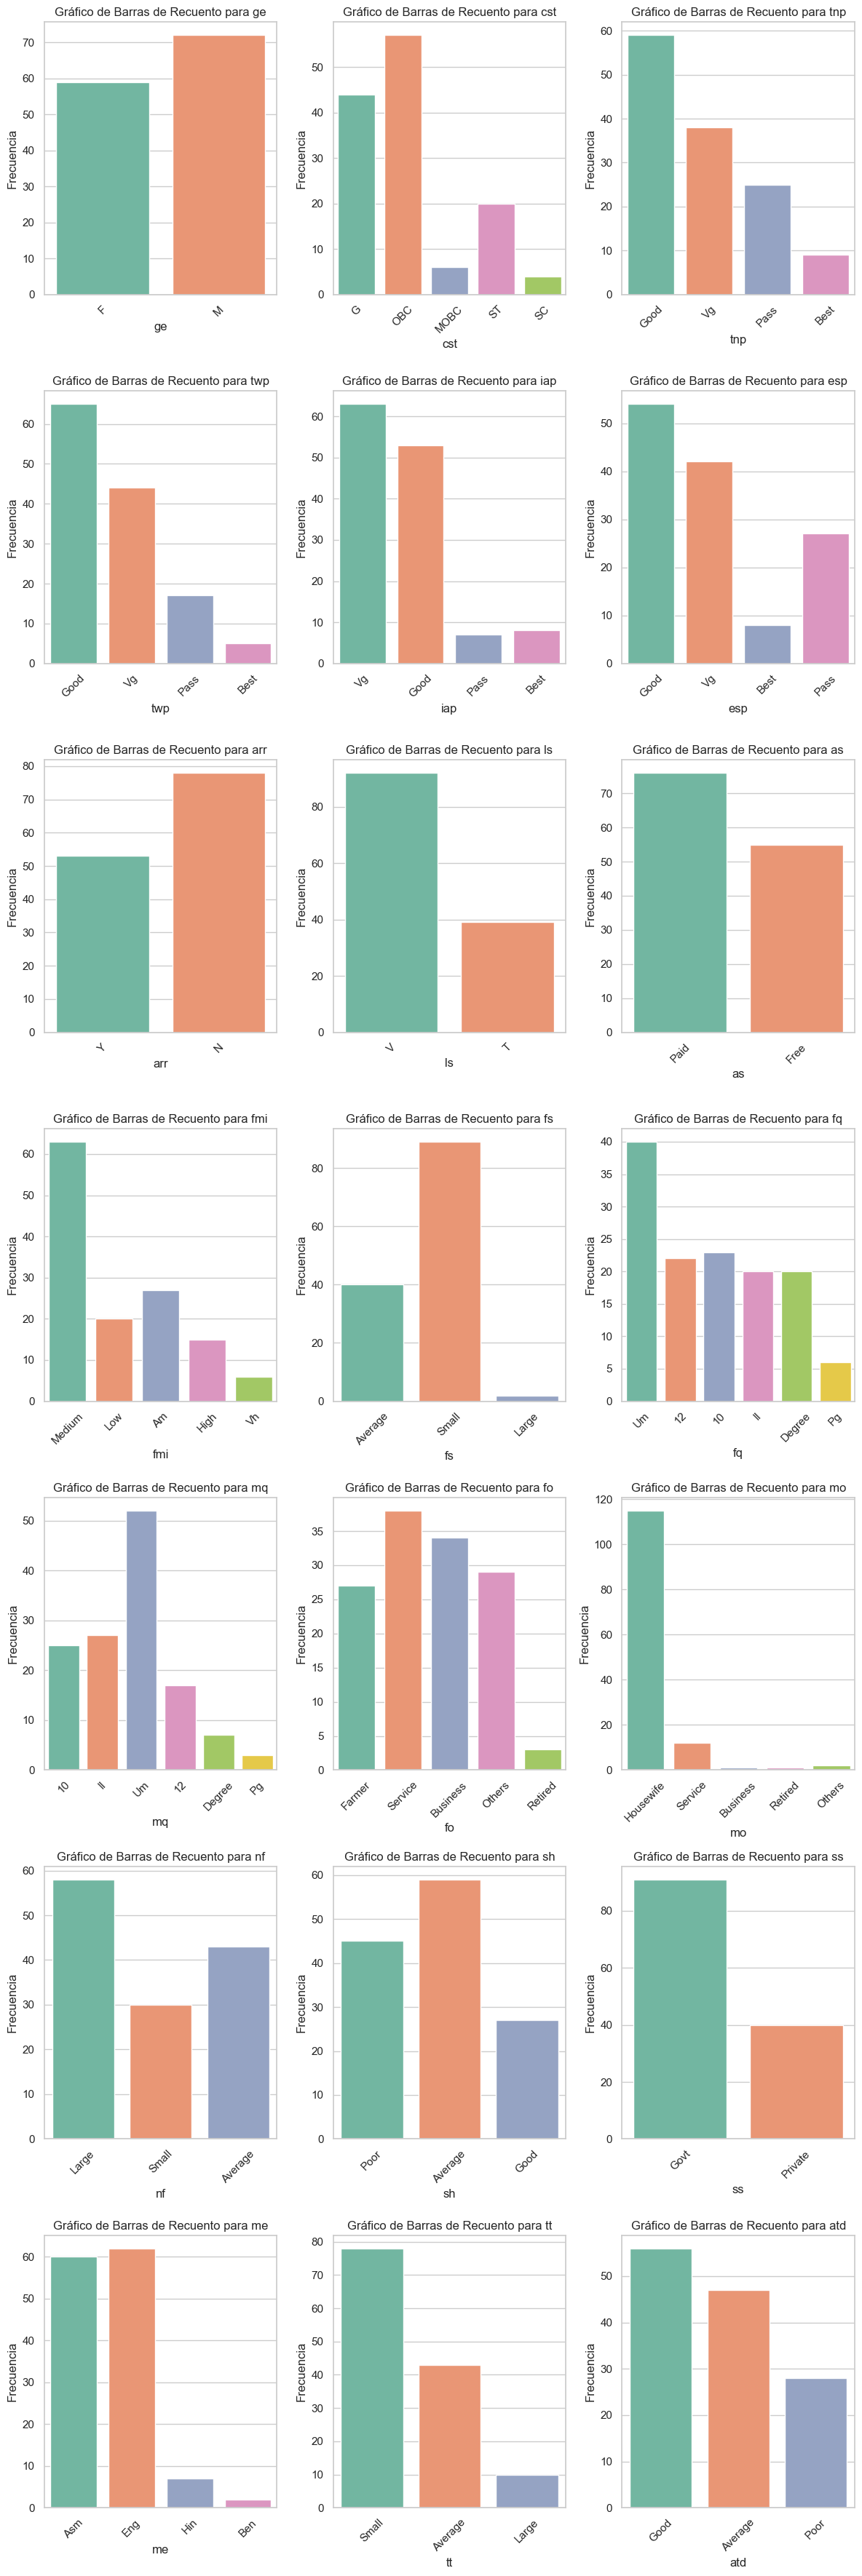

In [21]:
# Select only object-type columns
columnas_objeto = student_data_df.select_dtypes(include='object').columns

# Set up the plot grid based on the number of columns
num_columns = len(columnas_objeto)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

sns.set(style="whitegrid")
fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows * 5))

# Flatten axs array if necessary (it might be 2D even for a single row)
axs = axs.flatten()

for i, columna in enumerate(columnas_objeto):
    # Get unique categories and assign a color for each one
    unique_values = student_data_df[columna].unique()
    
    # Create a count plot with the column as both the x and hue variable to avoid the warning
    sns.countplot(x=columna, data=student_data_df, ax=axs[i], hue=columna, dodge=False, palette="Set2", legend=False)
    axs[i].set_title(f'Gráfico de Barras de Recuento para {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')
    axs[i].tick_params(axis='x', rotation=45)

# Remove any unused axes if necessary
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [22]:
# La varibale de salida será el End Semester Porcentage (esp). 
# Esta variable refleja el rendimiento académico final de los estudiantes, lo queremos predecir en función de varias características de entrada.
y = pd.DataFrame(student_data_df['esp'])
X = student_data_df.drop('esp', axis=1)
print(y)

      esp
0    Good
1      Vg
2    Good
3    Good
4      Vg
..    ...
126  Pass
127  Good
128  Good
129  Pass
130  Pass

[131 rows x 1 columns]


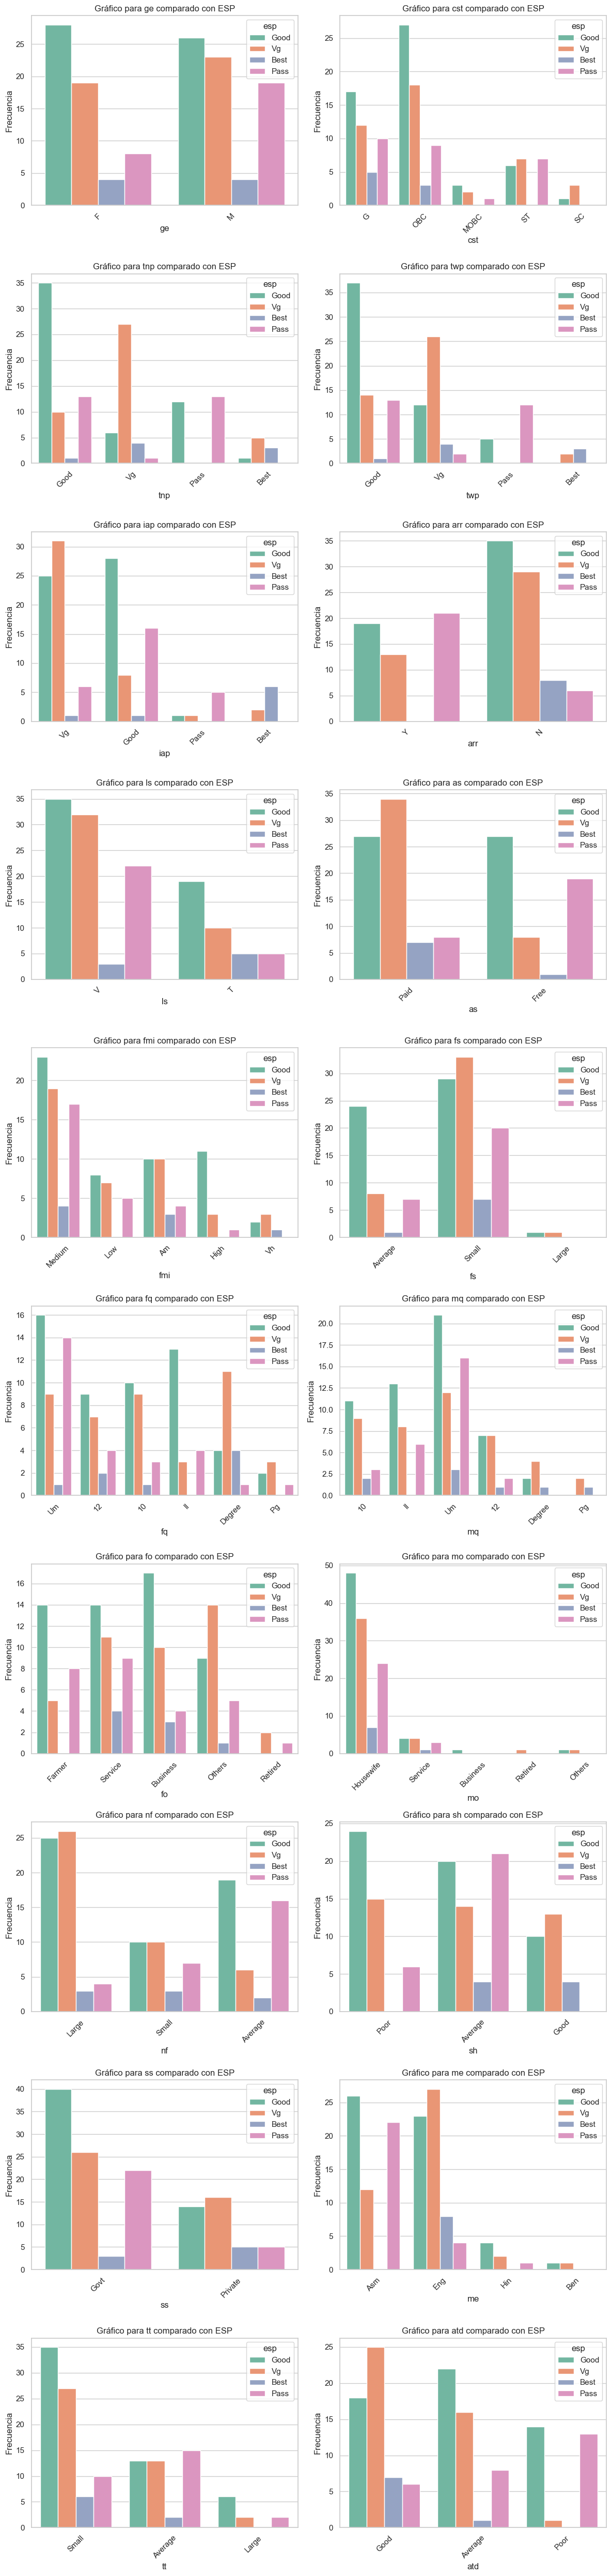

In [23]:
# Select only object-type columns and exclude 'esp'
columnas_objeto = student_data_df.select_dtypes(include='object').columns
columnas_objeto = [col for col in columnas_objeto if col != 'esp']  # Exclude 'esp'

# Set up the plot grid based on the number of columns
num_columns = len(columnas_objeto)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

sns.set(style="whitegrid")
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))

# Flatten axs array if necessary (it might be 2D even for a single row)
axs = axs.flatten()

for i, columna in enumerate(columnas_objeto):
    # Create a count plot with 'esp' as the hue
    sns.countplot(x=columna, data=student_data_df, ax=axs[i], hue='esp', dodge=True, palette='Set2')
    
    axs[i].set_title(f'Gráfico para {columna} comparado con ESP')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')
    axs[i].tick_params(axis='x', rotation=45)

# Remove any unused axes if necessary
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## Entendiendo la variable de salida

esp
Good    41.221374
Vg      32.061069
Pass    20.610687
Best     6.106870
Name: count, dtype: float64


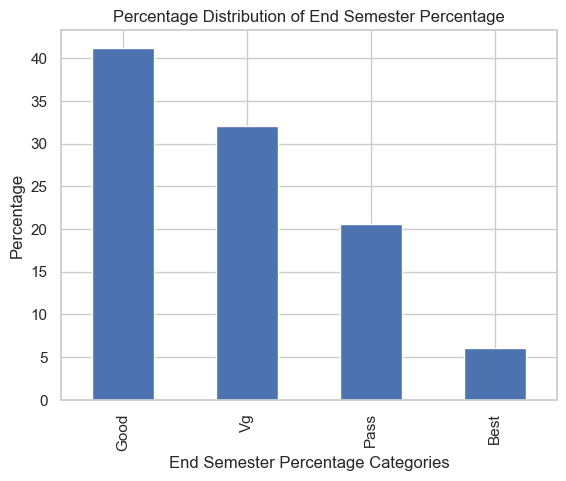

In [24]:
# Calculate the value counts for each class in 'End Semester Percentage'
value_counts = student_data_df['esp'].value_counts()

# Calculate the percentage for each class
percentage = (value_counts / len(student_data_df)) * 100

# Display the results
print(percentage)

# Optional: If you want to display as a nice bar plot
import matplotlib.pyplot as plt

percentage.plot(kind='bar')
plt.title('Percentage Distribution of End Semester Percentage')
plt.xlabel('End Semester Percentage Categories')
plt.ylabel('Percentage')
plt.show()

Dado que existe un desequilibrio de clases, una opción es sobremuestrear las clases minoritarias ("Pass" y "Best") con SMOTE (Synthetic Minority Over-sampling Technique), que genera muestras sintéticas.

In [26]:
from imblearn.over_sampling import SMOTE

# Assuming your dataframe is named 'df'
# Perform one-hot encoding on the entire dataframe
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.astype(int)

# Apply SMOTE to handle the class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Check the new class distribution after applying SMOTE
print(y_resampled.value_counts())



esp 
Best    54
Good    54
Pass    54
Vg      54
Name: count, dtype: int64


## Classification Models

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots a confusion matrix using Seaborn's heatmap with colors, rectangles, and labels.

    Parameters:
    - y_true: The true labels
    - y_pred: The predicted labels
    - labels: A list of labels for the x and y axes (classes)

    Example usage:
    plot_confusion_matrix(y_test, y_pred, labels=['Best', 'Good', 'Pass', 'Vg'])
    """
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='black')

    # Add labels, title, and axis titles
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)

    # Display the plot
    plt.show()

labels = ['Best', 'Good', 'Pass', 'Vg']

# Logistic Regression
Un algoritmo de clasificación básico que es útil para problemas binarios y multiclase. Modela la probabilidad de que una entrada dada pertenezca a una clase particular.

              precision    recall  f1-score   support

        Best       1.00      1.00      1.00        11
        Good       0.67      0.60      0.63        10
        Pass       0.73      0.79      0.76        14
          Vg       0.78      0.78      0.78         9

    accuracy                           0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.79      0.80      0.79        44

Accuracy: 0.7954545454545454


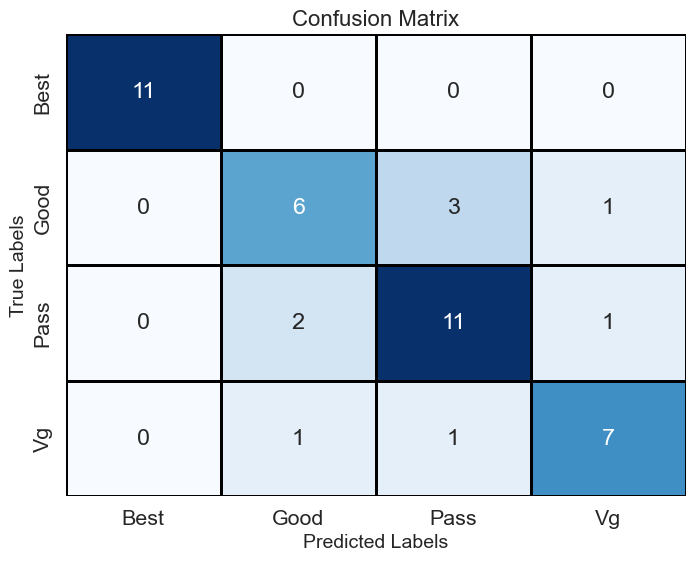

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert y_train and y_test to 1D arrays (flattening)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plot_confusion_matrix(y_test, y_pred, labels)


# Random Forest
Un algoritmo de clasificación básico que es útil para problemas binarios y multiclase. Modela la probabilidad de que una entrada dada pertenezca a una clase particular.

              precision    recall  f1-score   support

        Best       1.00      1.00      1.00        11
        Good       0.75      0.60      0.67        10
        Pass       0.79      0.79      0.79        14
          Vg       0.73      0.89      0.80         9

    accuracy                           0.82        44
   macro avg       0.82      0.82      0.81        44
weighted avg       0.82      0.82      0.82        44

Accuracy: 0.8181818181818182


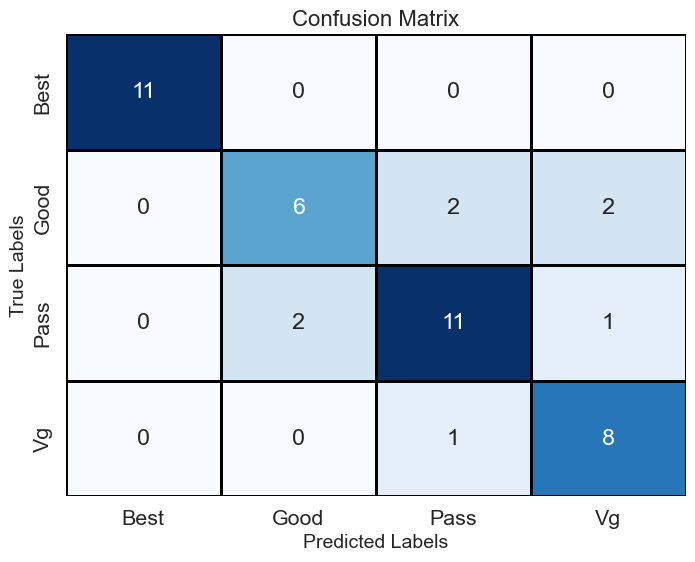

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plot_confusion_matrix(y_test, y_pred, labels)

## XGBoost
Un método de conjunto avanzado basado en el aumento de gradiente, ampliamente utilizado para tareas de clasificación y generalmente robusto contra el sobreajuste. También puede manejar el desequilibrio de clases con scale_pos_weight.

              precision    recall  f1-score   support

        Best       1.00      1.00      1.00        11
        Good       0.62      0.50      0.56        10
        Pass       0.79      0.79      0.79        14
          Vg       0.73      0.89      0.80         9

    accuracy                           0.80        44
   macro avg       0.78      0.79      0.79        44
weighted avg       0.79      0.80      0.79        44

Accuracy: 0.7954545454545454


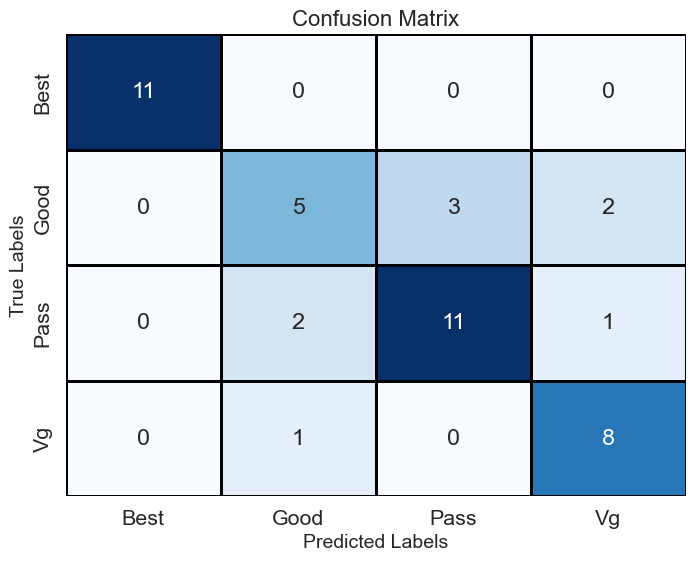

In [31]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode the target labels
label_encoder = LabelEncoder()

# If y_resampled is a DataFrame, extract the values and flatten it
y_resampled_encoded = label_encoder.fit_transform(y_resampled.values.ravel())  # Convert DataFrame to NumPy array and flatten

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

# Train an XGBoost model without the deprecated use_label_encoder parameter
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plot_confusion_matrix(y_test, y_pred, labels)

## Support Vector Machine (SVM)
SVM se puede utilizar para problemas de clasificación binaria y multiclase. Funciona bien con conjuntos de datos pequeños y medianos.

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      0.60      0.67        10
           2       0.80      0.86      0.83        14
           3       0.73      0.89      0.80         9

    accuracy                           0.82        44
   macro avg       0.82      0.81      0.81        44
weighted avg       0.82      0.82      0.82        44

Accuracy: 0.8181818181818182


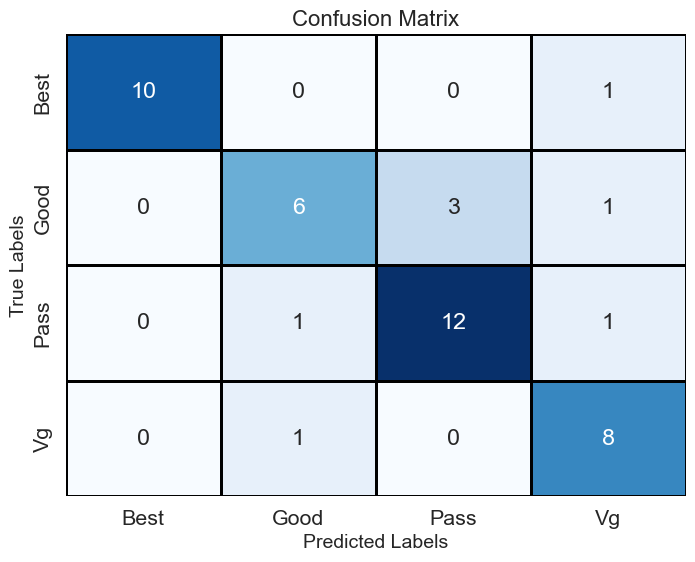

In [32]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plot_confusion_matrix(y_test, y_pred, labels)

In [ ]:
!pip install ucimlrepo

In [ ]:
# Versión del código con el uso de pipelines para el ajuste de modelos

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo

# Cargar el dataset
student_data = fetch_ucirepo(name='Student Academics Performance')
X = student_data.data.features
y = X.pop('esp')

# Convertir las etiquetas de clase a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocesamiento
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar el preprocesamiento antes de SMOTE
X_preprocessed = preprocessor.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': SVC(kernel='linear', class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

# Entrenar y evaluar los modelos
for name, model in models.items():
    clf = Pipeline(steps=[('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Este código utiliza pipelines para estructurar el preprocesamiento y el ajuste de modelos, lo que facilita la gestión y la escalabilidad